In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = [
    ["Ruim", "Alta", "Nenhuma", "$0 a $15k", "≤30 anos", "Alto"],
    ["Desconhecida", "Alta", "Nenhuma", "$15 a $35k", "31–60 anos", "Alto"],
    ["Desconhecida", "Baixa", "Nenhuma", "$15 a $35k", "≤30 anos", "Moderado"],
    ["Desconhecida", "Baixa", "Nenhuma", "$0 a $15k", "≤30 anos", "Alto"],
    ["Desconhecida", "Baixa", "Nenhuma", "Acima de $35k", "31–60 anos", "Baixo"],
    ["Desconhecida", "Baixa", "Adequada", "Acima de $35k", ">60 anos", "Baixo"],
    ["Ruim", "Baixa", "Nenhuma", "$0 a $15k", "≤30 anos", "Alto"],
    ["Ruim", "Baixa", "Adequada", "Acima de $35k", "31–60 anos", "Moderado"],
    ["Boa", "Baixa", "Nenhuma", "Acima de $35k", "31–60 anos", "Baixo"],
    ["Boa", "Alta", "Adequada", "Acima de $35k", ">60 anos", "Baixo"],
    ["Boa", "Alta", "Nenhuma", "$0 a $15k", "≤30 anos", "Alto"],
    ["Boa", "Alta", "Nenhuma", "$15 a $35k", "31–60 anos", "Moderado"],
    ["Boa", "Alta", "Nenhuma", "Acima de $35k", "31–60 anos", "Baixo"],
    ["Ruim", "Alta", "Nenhuma", "$15 a $35k", "≤30 anos", "Alto"],
    ["Ruim", "Alta", "Adequada", "$0 a $15k", "≤30 anos", "Moderado"],
    ["Boa", "Baixa", "Adequada", "$15 a $35k", "31–60 anos", "Baixo"],
    ["Desconhecida", "Alta", "Nenhuma", "Acima de $35k", "31–60 anos", "Moderado"],
    ["Boa", "Baixa", "Nenhuma", "$0 a $15k", "≤30 anos", "Moderado"],
    ["Ruim", "Baixa", "Nenhuma", "Acima de $35k", ">60 anos", "Moderado"],
    ["Boa", "Alta", "Adequada", "$15 a $35k", "31–60 anos", "Baixo"],
    ["Desconhecida", "Alta", "Adequada", "Acima de $35k", ">60 anos", "Moderado"],
    ["Ruim", "Alta", "Nenhuma", "Acima de $35k", "31–60 anos", "Alto"],
    ["Boa", "Baixa", "Adequada", "$0 a $15k", "≤30 anos", "Moderado"],
    ["Desconhecida", "Baixa", "Nenhuma", "$15 a $35k", "≤30 anos", "Moderado"],
    ["Boa", "Alta", "Nenhuma", "Acima de $35k", ">60 anos", "Moderado"],
    ["Ruim", "Baixa", "Adequada", "$15 a $35k", "31–60 anos", "Baixo"],
    ["Boa", "Baixa", "Nenhuma", "$15 a $35k", "≤30 anos", "Baixo"],
    ["Desconhecida", "Alta", "Nenhuma", "$0 a $15k", "≤30 anos", "Alto"],
    ["Boa", "Alta", "Adequada", "Acima de $35k", ">60 anos", "Baixo"],
    ["Ruim", "Alta", "Nenhuma", "$15 a $35k", "31–60 anos", "Alto"],
]

columns = ["História de Crédito", "Dívida", "Garantia", "Renda", "Idade", "Risco"]
df = pd.DataFrame(data, columns=columns)
X = df.drop("Risco", axis=1)
y = df["Risco"]

df

,História de Crédito,Dívida,Garantia,Renda,Idade,Risco
0,Ruim,Alta,Nenhuma,$0 a $15k,≤30 anos,Alto
1,Desconhecida,Alta,Nenhuma,$15 a $35k,31–60 anos,Alto
2,Desconhecida,Baixa,Nenhuma,$15 a $35k,≤30 anos,Moderado
3,Desconhecida,Baixa,Nenhuma,$0 a $15k,≤30 anos,Alto
4,Desconhecida,Baixa,Nenhuma,Acima de $35k,31–60 anos,Baixo
5,Desconhecida,Baixa,Adequada,Acima de $35k,>60 anos,Baixo
6,Ruim,Baixa,Nenhuma,$0 a $15k,≤30 anos,Alto
7,Ruim,Baixa,Adequada,Acima de $35k,31–60 anos,Moderado
8,Boa,Baixa,Nenhuma,Acima de $35k,31–60 anos,Baixo
9,Boa,Alta,Adequada,Acima de $35k,>60 anos,Baixo


In [3]:
print("CART")

X_enc = X.apply(LabelEncoder().fit_transform)
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf.fit(X_enc, y)

print(export_text(clf, feature_names=list(X.columns)))

CART
|--- Garantia <= 0.50
|   |--- Idade <= 1.50
|   |   |--- História de Crédito <= 0.50
|   |   |   |--- class: Baixo
|   |   |--- História de Crédito >  0.50
|   |   |   |--- class: Baixo
|   |--- Idade >  1.50
|   |   |--- class: Moderado
|--- Garantia >  0.50
|   |--- Renda <= 0.50
|   |   |--- História de Crédito <= 0.50
|   |   |   |--- class: Alto
|   |   |--- História de Crédito >  0.50
|   |   |   |--- class: Alto
|   |--- Renda >  0.50
|   |   |--- História de Crédito <= 1.50
|   |   |   |--- class: Moderado
|   |   |--- História de Crédito >  1.50
|   |   |   |--- class: Alto



# 3

In [4]:
# database: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Acurácia: 0.70995670995671


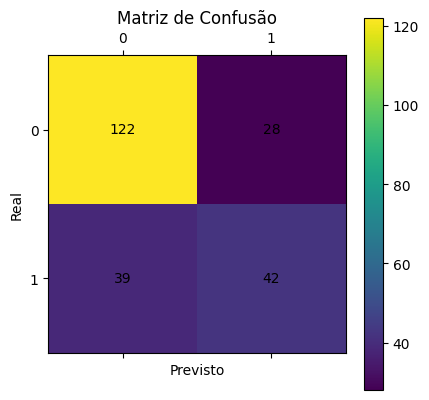

Regras da Árvore:
|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Pregnancies <= 7.00
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.00
|   |   |   |   |--- class: 1
|   |   |--- BMI >  45.40
|   |   |   |--- class: 1
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  99.50
|   |   |   |   |--- class: 1
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 166.50
|   |   |   |--- Age <= 50.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  50.50
|   |   |   |   |--- class: 0
|   |   |--- Glucose >  166.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.55
|   |   |   |   |--- class: 1
|   |   |   |--- DiabetesPedigreeFunction >  0.55
|   |   |   |   |--- class: 0
|   |--- BMI >  29

In [5]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

print("Regras da Árvore:")
rules = export_text(tree, feature_names=list(X.columns))
print(rules)
